In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tsfel
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

### TASK 2 MODEL

In [2]:
basePath = r"Combined/Train"

activities = os.listdir(basePath)

data_list = []
for acitivity in activities:
    folder_path = os.path.join(basePath,acitivity)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path,file)
        df = pd.read_csv(file_path)
        df['activity'] = acitivity
        data_list.append(df)

data_combined_train = pd.concat(data_list,ignore_index=True)

X_train_combined = data_combined_train[['accx','accy','accz']]
y_train_combined = data_combined_train['activity']
y_train_combined = y_train_combined.astype('category')

basePath = r"Combined/Test"

activities = os.listdir(basePath)

data_list = []
for acitivity in activities:
    folder_path = os.path.join(basePath,acitivity)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path,file)
        df = pd.read_csv(file_path)
        df['activity'] = acitivity
        data_list.append(df)

data_combined_test = pd.concat(data_list,ignore_index=True)

X_test_combined = data_combined_test[['accx','accy','accz']]
y_test_combined = data_combined_test['activity']
y_test_combined = y_test_combined.astype('category')

model_combined = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
model_combined.fit(X_train_combined,y_train_combined)

print(X_train_combined)

            accx      accy      accz
0       0.181141  0.787813  0.581194
1       0.180389  0.788230  0.584017
2       0.184572  0.788880  0.580620
3       0.187104  0.788494  0.574279
4       0.186461  0.786544  0.570184
...          ...       ...       ...
470523  1.243491 -0.295004 -0.595854
470524  1.232883 -0.261457 -0.721940
470525  1.224313 -0.212016 -0.667843
470526  1.136817 -0.231938 -0.661757
470527  0.986781 -0.278910 -0.726052

[470528 rows x 3 columns]


### DATA HANDLING

In [3]:
basePath = "Self_Data"
activities = []

data_list = []
for file in os.listdir(basePath):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(basePath, file))
        df = df[500:]

        df.rename(columns={
            'ax (m/s^2)': 'accx',
            'ay (m/s^2)': 'accy',
            'az (m/s^2)': 'accz'
        }, inplace=True)

        activity = file.replace('.csv', '')
        df['activity'] = activity

        data_list.append(df)

data = pd.concat(data_list, ignore_index=True)

X = data[['accx', 'accy', 'accz']]
y = data['activity'].astype('category')

### **QUESTION 1**

Accuracy: 0.1311
Precision: 0.1154
Recall: 0.1311


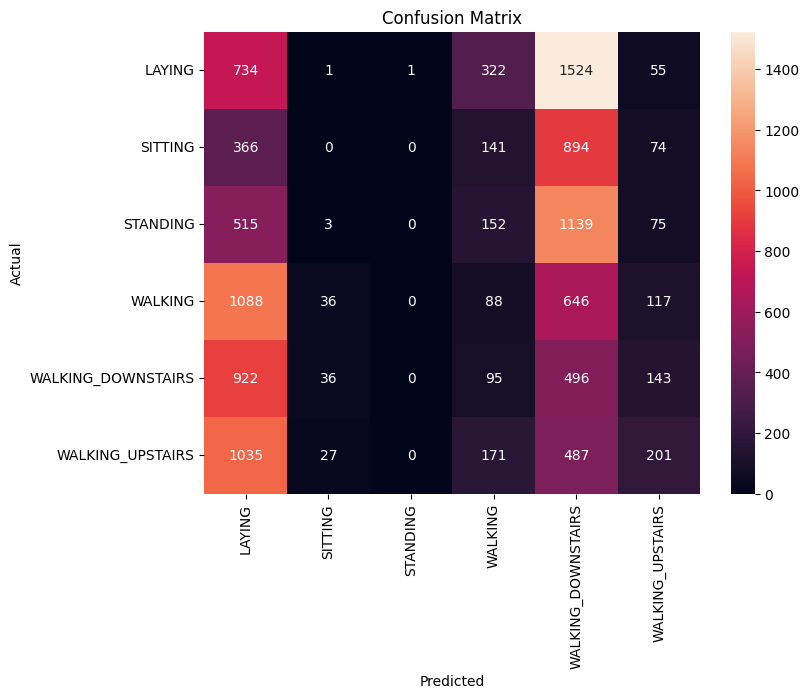

In [4]:
y_pred_1 = model_combined.predict(X)

accuracy_combined = accuracy_score(y, y_pred_1)
precision_combined = precision_score(y, y_pred_1, average='weighted', zero_division=0)
recall_combined = recall_score(y, y_pred_1, average='weighted', zero_division=0)

print("Accuracy:", round(accuracy_combined, 4))
print("Precision:", round(precision_combined, 4))
print("Recall:", round(recall_combined, 4))

cm_combined = confusion_matrix(y, y_pred_1, labels=model_combined.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d',
            xticklabels=model_combined.classes_,
            yticklabels=model_combined.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The model is performing very poorly due, this may be due to difference in data collection style of the author and our this leads to variations

### **QUESTION 2**

Accuracy: 0.4655
Precision: 0.4635
Recall: 0.4655


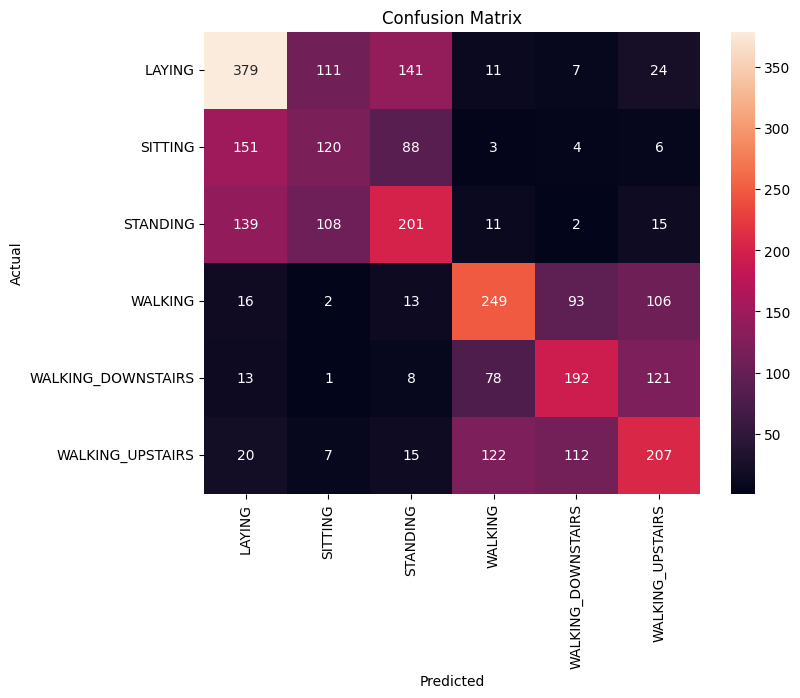

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

model = DecisionTreeClassifier(criterion='gini',max_depth=None,random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model performs below average without preprocessing, which means that preprocessing significantly boosts performance